# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-17 06:00:22.886107


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/16/20


,12/16/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,16964180,307429,1.81
Brazil,7040608,183735,2.61
India,9956557,144451,1.45
Mexico,1277499,115769,9.06
Italy,1888144,66537,3.52
United Kingdom,1918736,65618,3.42
France,2465126,59472,2.41


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/16/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
58077,US,16518420,2020-12-14,300754.0,1523.0,192805.0,215274.428571
58076,US,16325615,2020-12-13,299231.0,1389.0,191378.0,215205.285714
58075,US,16134237,2020-12-12,297842.0,2352.0,220945.0,213055.142857
58074,US,15913292,2020-12-11,295490.0,3306.0,233133.0,212240.571429
58073,US,15680159,2020-12-10,292184.0,2743.0,226085.0,211732.000000
58072,US,15454074,2020-12-09,289441.0,3106.0,222803.0,210808.000000
58071,US,15231271,2020-12-08,286335.0,2536.0,219772.0,207902.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/16/20


,12/16/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,804555,35927.0,4.47
Texas,1534450,24920.0,1.62
California,1708559,21817.0,1.28
Florida,1155335,20204.0,1.75
New Jersey,415075,18003.0,4.34
Illinois,870600,15777.0,1.81
Pennsylvania,524940,13109.0,2.50


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/16/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1977,California,1611493,2020-12-14,21144.0,104.0,26115.0,31523.571429
1976,California,1585378,2020-12-13,21040.0,82.0,36202.0,31243.571429
1975,California,1549176,2020-12-12,20958.0,171.0,32961.0,30176.428571
1974,California,1516215,2020-12-11,20787.0,184.0,33664.0,29415.428571
1973,California,1482551,2020-12-10,20603.0,192.0,33564.0,28000.142857
1972,California,1448987,2020-12-09,20411.0,206.0,33591.0,26257.857143
1971,California,1415396,2020-12-08,20205.0,190.0,24568.0,24193.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/16/20


,12/16/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,566005,8568.0,1.51
Orange,112893,1718.0,1.52
Riverside,131822,1666.0,1.26
San Bernardino,137548,1304.0,0.95
San Diego,114248,1217.0,1.07
Sacramento,51076,699.0,1.37
Alameda,40026,563.0,1.41


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/16/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6267,Los Angeles,532730,2020-12-14,8345.0,47.0,7244.0,10692.857143
6266,Los Angeles,525486,2020-12-13,8298.0,29.0,12614.0,10805.000000
6265,Los Angeles,512872,2020-12-12,8269.0,70.0,11237.0,10494.857143
6264,Los Angeles,501635,2020-12-11,8199.0,50.0,13718.0,10150.285714
6263,Los Angeles,487917,2020-12-10,8149.0,74.0,12646.0,9433.714286
6262,Los Angeles,475271,2020-12-09,8075.0,75.0,8950.0,8726.571429
6261,Los Angeles,466321,2020-12-08,8000.0,64.0,8441.0,8275.000000
6260,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714
6259,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6258,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000



7 day new US cases as of 12/16/20


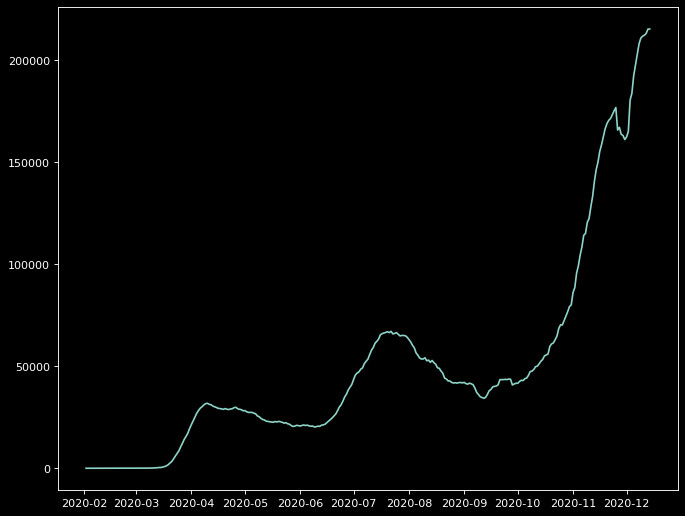

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/16/20


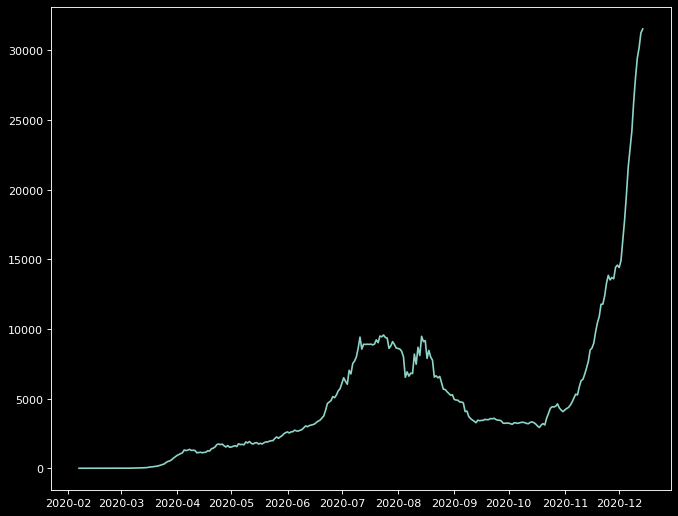

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/16/20


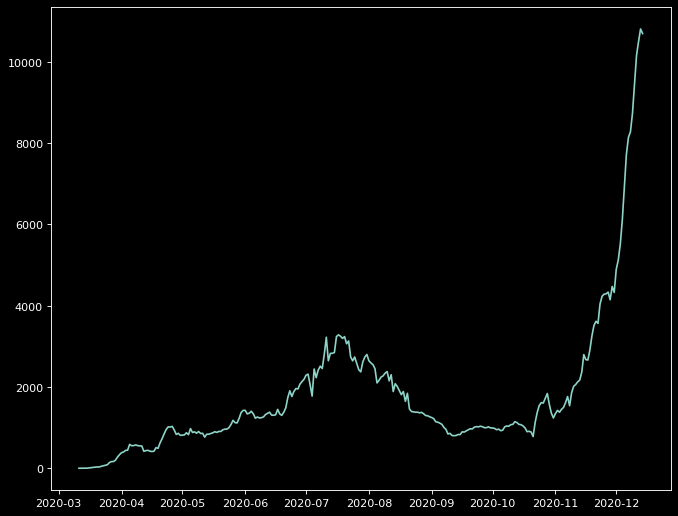

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()